In [214]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [215]:
#Install scikit learn
!pip install sklearn

In [216]:
#Load Data
df = pd.read_csv('student_prediction.csv')

In [217]:
df.head()

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [218]:
df.columns

Index(['STUDENTID', 'AGE', 'GENDER', 'HS_TYPE', 'SCHOLARSHIP', 'WORK',
       'ACTIVITY', 'PARTNER', 'SALARY', 'TRANSPORT', 'LIVING', 'MOTHER_EDU',
       'FATHER_EDU', '#_SIBLINGS', 'KIDS', 'MOTHER_JOB', 'FATHER_JOB',
       'STUDY_HRS', 'READ_FREQ', 'READ_FREQ_SCI', 'ATTEND_DEPT', 'IMPACT',
       'ATTEND', 'PREP_STUDY', 'PREP_EXAM', 'NOTES', 'LISTENS',
       'LIKES_DISCUSS', 'CLASSROOM', 'CUML_GPA', 'EXP_GPA', 'COURSE ID',
       'GRADE'],
      dtype='object')

In [219]:
df = df.drop("READ_FREQ_SCI", axis=1)
df = df.drop("ATTEND_DEPT", axis=1)
df = df.drop("PREP_STUDY", axis=1)
df = df.drop("LIKES_DISCUSS", axis=1)
df = df.drop("CLASSROOM", axis=1)
df = df.drop("HS_TYPE", axis=1)
df = df.drop("IMPACT", axis=1)
df = df.drop("CUML_GPA", axis=1)
df = df.drop("EXP_GPA", axis=1)
df = df.drop("ACTIVITY", axis=1)
df = df.drop("AGE", axis=1)
df = df.drop("GENDER", axis=1)
df = df.drop("SCHOLARSHIP", axis=1)
df = df.drop("WORK", axis=1)
df = df.drop("PARTNER", axis=1)
df = df.drop("SALARY", axis=1)
df = df.drop("TRANSPORT", axis=1)
df = df.drop("#_SIBLINGS", axis=1)
df = df.drop("MOTHER_EDU", axis=1)
df = df.drop("FATHER_EDU", axis=1)
df = df.drop("MOTHER_JOB", axis=1)
df = df.drop("FATHER_JOB", axis=1)
df = df.drop("COURSE ID", axis=1)
df = df.drop("LIVING", axis=1)
df = df.drop("KIDS", axis=1)

In [220]:
df.shape

(145, 8)

In [221]:
#Data Understanding
df.dtypes

STUDENTID    object
STUDY_HRS     int64
READ_FREQ     int64
ATTEND        int64
PREP_EXAM     int64
NOTES         int64
LISTENS       int64
GRADE         int64
dtype: object

In [222]:
df.describe()

,STUDY_HRS,READ_FREQ,ATTEND,PREP_EXAM,NOTES,LISTENS,GRADE
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,2.200000,1.944828,1.241379,1.165517,2.544828,2.055172,3.227586
std,0.917424,0.562476,0.429403,0.408483,0.564940,0.674736,2.197678
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000
50%,2.000000,2.000000,1.000000,1.000000,3.000000,2.000000,3.000000
75%,3.000000,2.000000,1.000000,1.000000,3.000000,3.000000,5.000000
max,5.000000,3.000000,2.000000,3.000000,3.000000,3.000000,7.000000


In [223]:
#check for null
df.isna().sum()

STUDENTID    0
STUDY_HRS    0
READ_FREQ    0
ATTEND       0
PREP_EXAM    0
NOTES        0
LISTENS      0
GRADE        0
dtype: int64

In [224]:
df['GRADE'].value_counts()

1    35
2    24
3    21
5    17
7    17
6    13
4    10
0     8
Name: GRADE, dtype: int64

In [225]:
##Create Pass/Fail, I used "4" as the split 
##I did numbers for speed on encoding later
df.loc[df['GRADE'] >=4 , 'Pass/Fail'] = 1 
df.loc[df['GRADE'] <4, 'Pass/Fail'] = 0

In [226]:
df

,STUDENTID,STUDY_HRS,READ_FREQ,ATTEND,PREP_EXAM,NOTES,LISTENS,GRADE,Pass/Fail
0,STUDENT1,3,2,1,1,3,2,1,0.0
1,STUDENT2,2,2,1,1,3,2,1,0.0
2,STUDENT3,2,1,1,1,2,2,1,0.0
3,STUDENT4,3,1,1,2,3,2,1,0.0
4,STUDENT5,2,1,1,1,2,2,1,0.0
...,...,...,...,...,...,...,...,...,...
140,STUDENT141,3,3,1,1,2,1,5,1.0
141,STUDENT142,3,2,2,1,3,2,5,1.0
142,STUDENT143,2,2,1,1,3,3,1,0.0
143,STUDENT144,2,2,1,1,2,1,4,1.0


In [227]:
##Wanted to see maybe if the target was very one way or another but it isn't. While it is skewed, it doesn't look too bad.
df['Pass/Fail'].value_counts()

0.0    88
1.0    57
Name: Pass/Fail, dtype: int64

In [228]:
df.columns

Index(['STUDENTID', 'STUDY_HRS', 'READ_FREQ', 'ATTEND', 'PREP_EXAM', 'NOTES',
       'LISTENS', 'GRADE', 'Pass/Fail'],
      dtype='object')

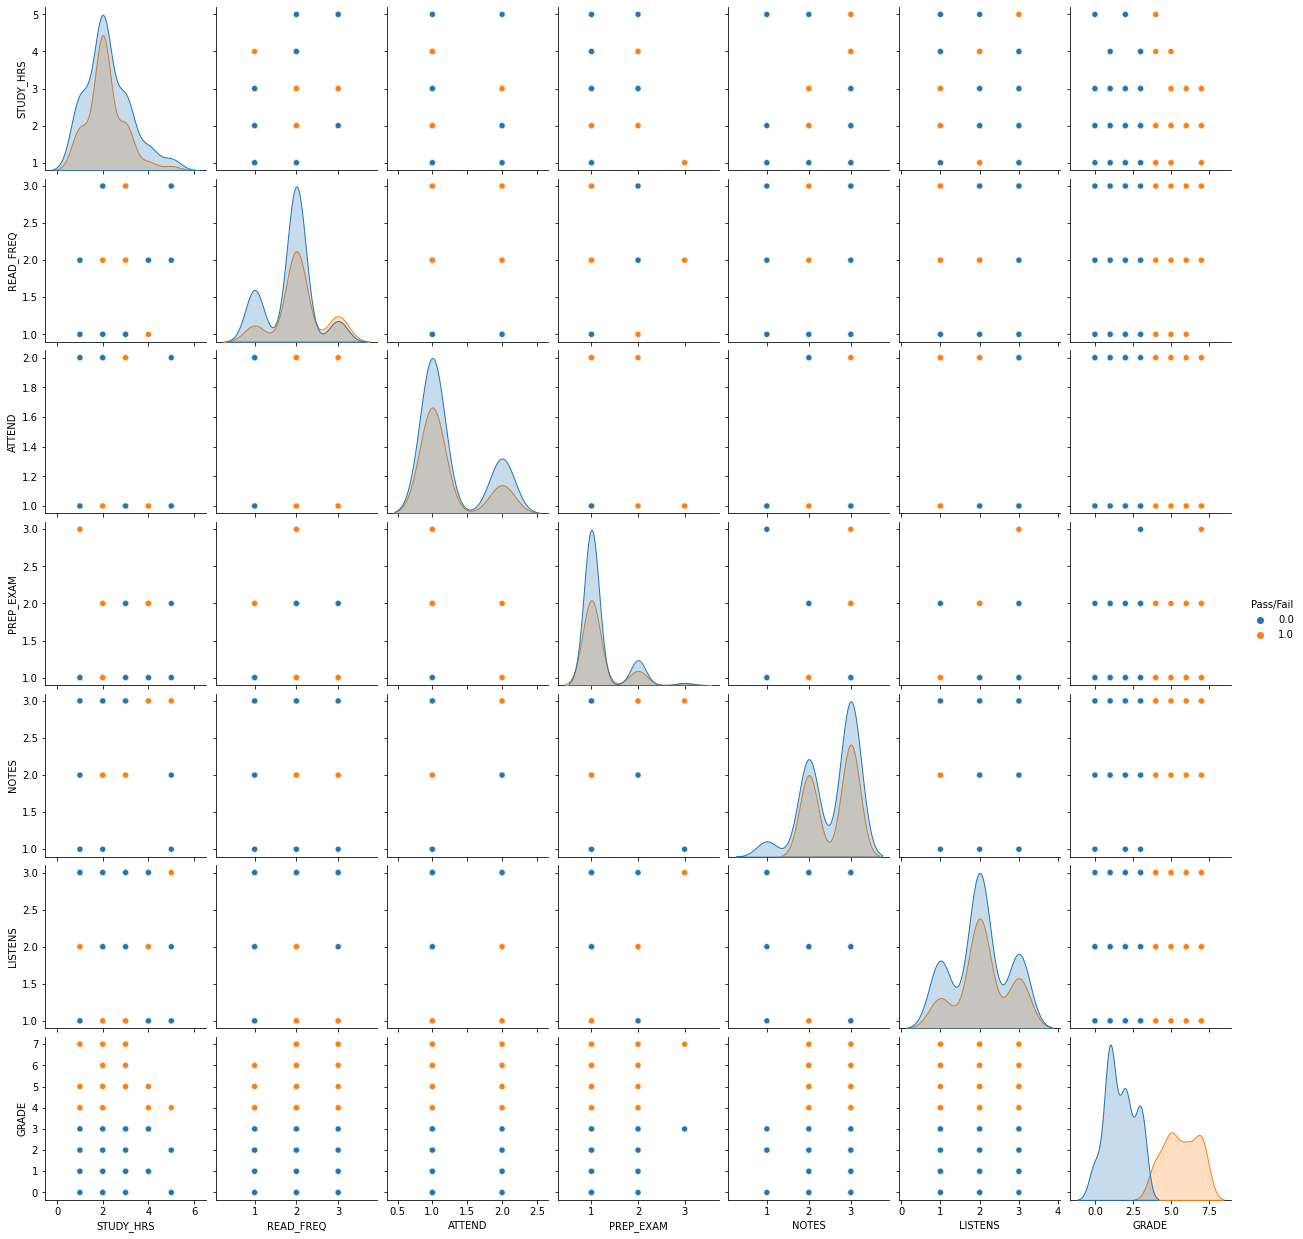

In [229]:
sns.pairplot(df, hue='Pass/Fail')

[Text(0.5, 1.0, 'Study Hours impact on GPA')]

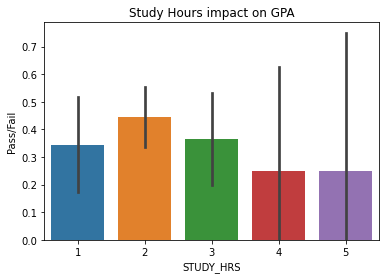

In [230]:
sns.barplot(x='STUDY_HRS', y='Pass/Fail', data = df).set(title='Study Hours impact on GPA')

[Text(0.5, 1.0, 'Attendance impact on GPA')]

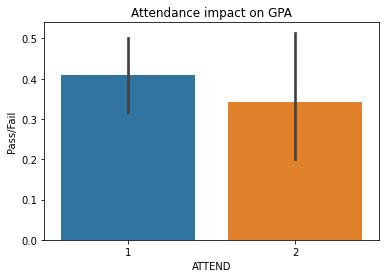

In [231]:
sns.barplot(x='ATTEND', y='Pass/Fail', data = df).set(title='Attendance impact on GPA')

[Text(0.5, 1.0, 'Reading frequency (non-scientific books/journals) impact on GPA')]

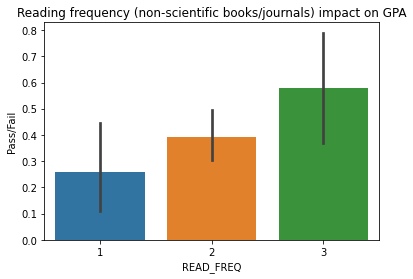

In [232]:
sns.barplot(x='READ_FREQ', y='Pass/Fail', data = df).set(title='Reading frequency (non-scientific books/journals) impact on GPA')

[Text(0.5, 1.0, 'Preparation to midterm exams (time) impact on GPA')]

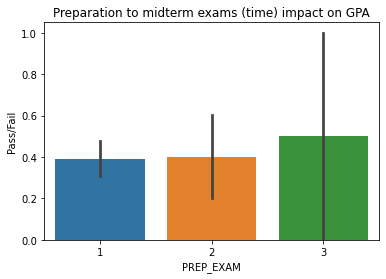

In [233]:
sns.barplot(x='PREP_EXAM', y='Pass/Fail', data = df).set(title='Preparation to midterm exams (time) impact on GPA')

[Text(0.5, 1.0, 'Taking notes in classes impact on GPA')]

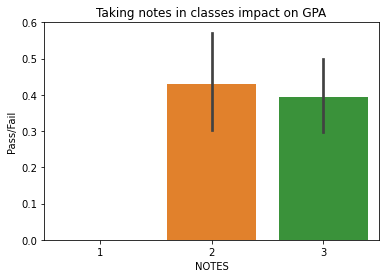

In [234]:
sns.barplot(x='NOTES', y='Pass/Fail', data = df).set(title='Taking notes in classes impact on GPA')

[Text(0.5, 1.0, 'Listens in classes impact on GPA')]

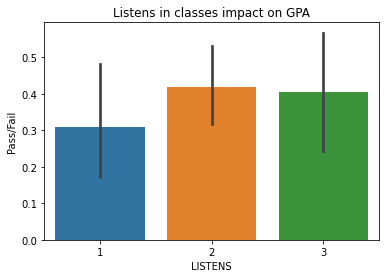

In [235]:
sns.barplot(x='LISTENS', y='Pass/Fail', data = df).set(title='Listens in classes impact on GPA')

In [236]:
df.corr()

,STUDY_HRS,READ_FREQ,ATTEND,PREP_EXAM,NOTES,LISTENS,GRADE,Pass/Fail
STUDY_HRS,1.000000,0.250309,-0.123396,0.281668,0.163465,-0.107697,-0.033065,-0.052509
READ_FREQ,0.250309,1.000000,-0.030735,0.040021,0.029691,-0.101711,0.195617,0.179975
ATTEND,-0.123396,-0.030735,1.000000,-0.189765,-0.145107,-0.094221,-0.139564,-0.058027
PREP_EXAM,0.281668,0.040021,-0.189765,1.000000,0.057903,-0.108951,0.073783,0.019615
NOTES,0.163465,0.029691,-0.145107,0.057903,1.000000,-0.024751,0.044862,0.048776
LISTENS,-0.107697,-0.101711,-0.094221,-0.108951,-0.024751,1.000000,0.085137,0.059955
GRADE,-0.033065,0.195617,-0.139564,0.073783,0.044862,0.085137,1.000000,0.889868
Pass/Fail,-0.052509,0.179975,-0.058027,0.019615,0.048776,0.059955,0.889868,1.000000


[Text(0.5, 1.0, 'Reading Frequency Strip Plot')]

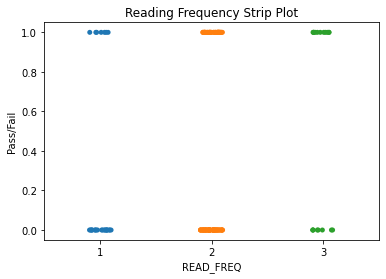

In [237]:
sns.stripplot(y='Pass/Fail', x='READ_FREQ', data=df).set(title='Reading Frequency Strip Plot')

[Text(0.5, 1.0, 'Study Hours Strip Plot')]

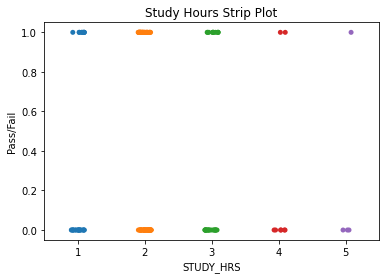

In [238]:
sns.stripplot(y='Pass/Fail', x='STUDY_HRS', data=df).set(title='Study Hours Strip Plot')

[Text(0.5, 1.0, 'Attendance Strip Plot')]

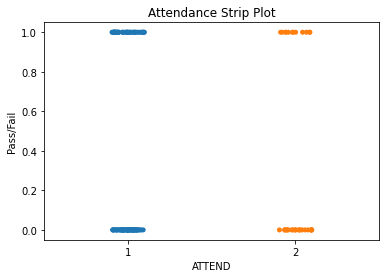

In [239]:
sns.stripplot(y='Pass/Fail', x='ATTEND', data=df).set(title='Attendance Strip Plot')

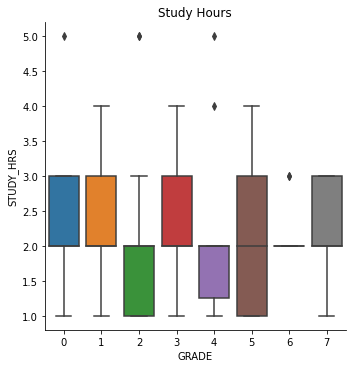

In [240]:
sns.catplot(x='GRADE', y='STUDY_HRS', kind='box', data=df).set(title='Study Hours')

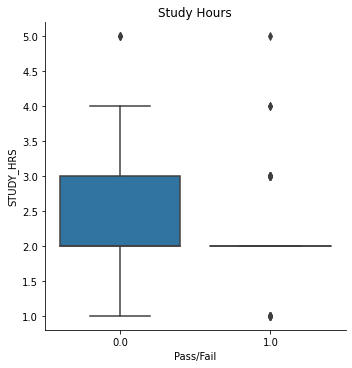

In [241]:
sns.catplot(x='Pass/Fail', y='STUDY_HRS', kind='box', data=df).set(title='Study Hours')

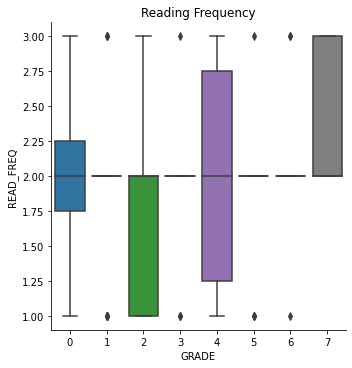

In [242]:
sns.catplot(x='GRADE', y='READ_FREQ', kind='box', data=df).set(title='Reading Frequency')

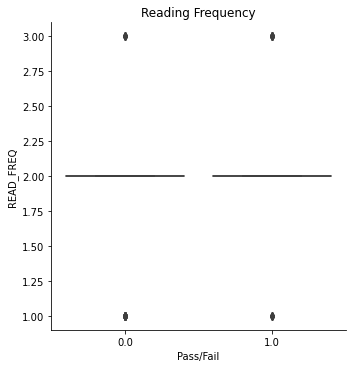

In [243]:
sns.catplot(x='Pass/Fail', y='READ_FREQ', kind='box', data=df).set(title='Reading Frequency')

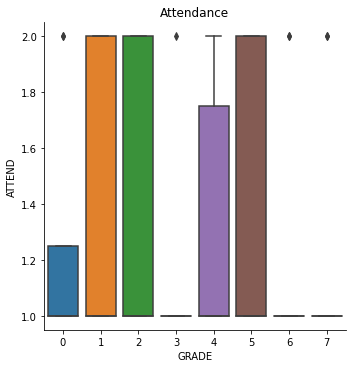

In [244]:
sns.catplot(x='GRADE', y='ATTEND', kind='box', data=df).set(title='Attendance')

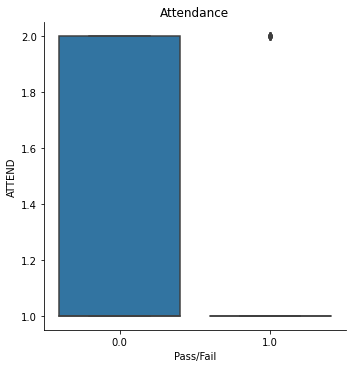

In [245]:
sns.catplot(x='Pass/Fail', y='ATTEND', kind='box', data=df).set(title='Attendance')

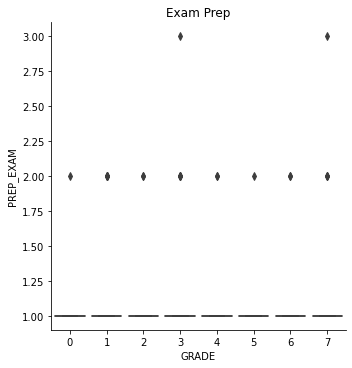

In [246]:
sns.catplot(x='GRADE', y='PREP_EXAM', kind='box', data=df).set(title='Exam Prep')

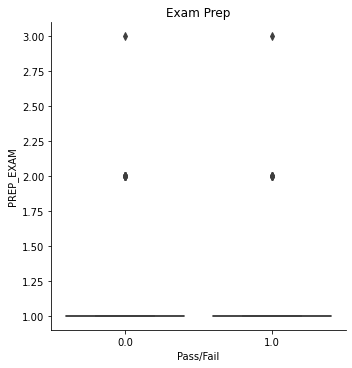

In [247]:
sns.catplot(x='Pass/Fail', y='PREP_EXAM', kind='box', data=df).set(title='Exam Prep')

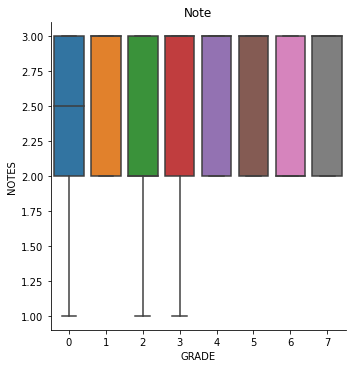

In [248]:
sns.catplot(x='GRADE', y='NOTES', kind='box', data=df).set(title='Note')

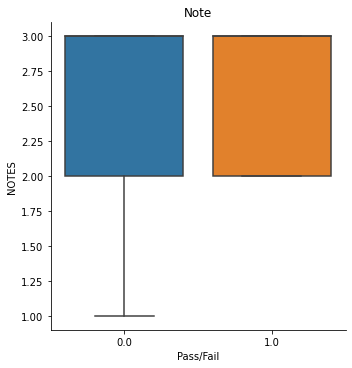

In [249]:
sns.catplot(x='Pass/Fail', y='NOTES', kind='box', data=df).set(title='Note')

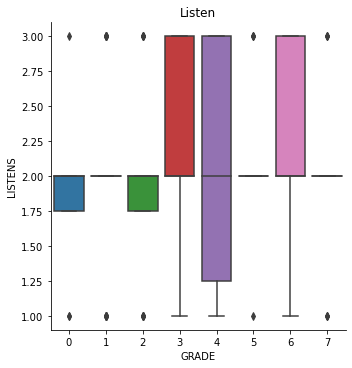

In [250]:
sns.catplot(x='GRADE', y='LISTENS', kind='box', data=df).set(title='Listen')

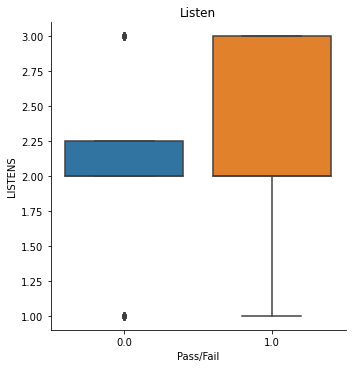

In [251]:
sns.catplot(x='Pass/Fail', y='LISTENS', kind='box', data=df).set(title='Listen')

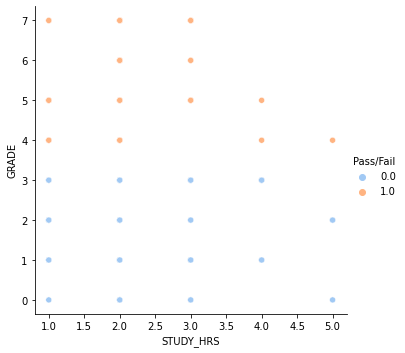

In [252]:
sns.relplot(x='STUDY_HRS', y='GRADE', hue = 'Pass/Fail', data = df, palette = 'pastel')

In [253]:
import seaborn as sns
from matplotlib import pyplot as plt

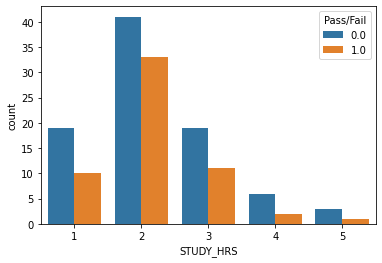

In [254]:
ax = sns.countplot(x = 'STUDY_HRS', data = df, hue = 'Pass/Fail')

In [255]:
##Convert into a numerical value as the models only like numbers, not strings
df['STUDENTID'] = pd.factorize(df['STUDENTID'])[0] + 1
df['STUDENTID']


##later on I found out that the Student ID column is not necessary in this case
##So when doing the model, I dropped it here so the model doesn't think it is important 
df.drop(['STUDENTID'],axis = 1, inplace = True)
df

,STUDY_HRS,READ_FREQ,ATTEND,PREP_EXAM,NOTES,LISTENS,GRADE,Pass/Fail
0,3,2,1,1,3,2,1,0.0
1,2,2,1,1,3,2,1,0.0
2,2,1,1,1,2,2,1,0.0
3,3,1,1,2,3,2,1,0.0
4,2,1,1,1,2,2,1,0.0
...,...,...,...,...,...,...,...,...
140,3,3,1,1,2,1,5,1.0
141,3,2,2,1,3,2,5,1.0
142,2,2,1,1,3,3,1,0.0
143,2,2,1,1,2,1,4,1.0


In [256]:
def cramers_v(x, y):
    import scipy.stats as ss
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [257]:
cramers_v(df['GRADE'], df['Pass/Fail'])

0.9787961779869995

In [258]:
cramers_v(df['Pass/Fail'], df['STUDY_HRS'])

0.0

In [259]:
df_cramers = pd.DataFrame(index = df.columns, columns = df.columns)

In [260]:
for col in df_cramers.columns:
    for row in df_cramers.index:
        df_cramers[col][row] = cramers_v(df[col], df[row])

<AxesSubplot:>

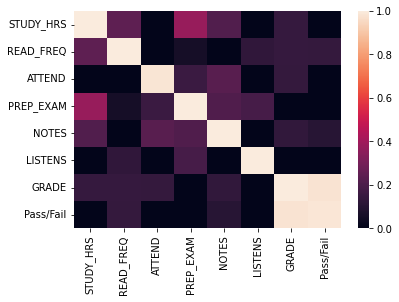

In [261]:
sns.heatmap(df_cramers.astype(float))

In [262]:
#Split into train and test data (prepare for modeling)

In [263]:
##Where there is a high correlation between grade and pass/fail, it was able to perfectly split on grade.
##Having "grade" within the test/train set meant the model is given the answers, therefore dropped it here
df.drop(['GRADE'],axis = 1,inplace = True)
x = df.drop(['Pass/Fail'], axis = 1) 
y = df['Pass/Fail'] #target value

In [264]:
x.shape, y.shape

((145, 6), (145,))

In [265]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [266]:
classifier = tree.DecisionTreeClassifier()

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

In [267]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((101, 6), (44, 6), (101,), (44,))

In [268]:
#train our model
classifier = classifier.fit(xtrain, ytrain)

In [269]:
#plot decision tree

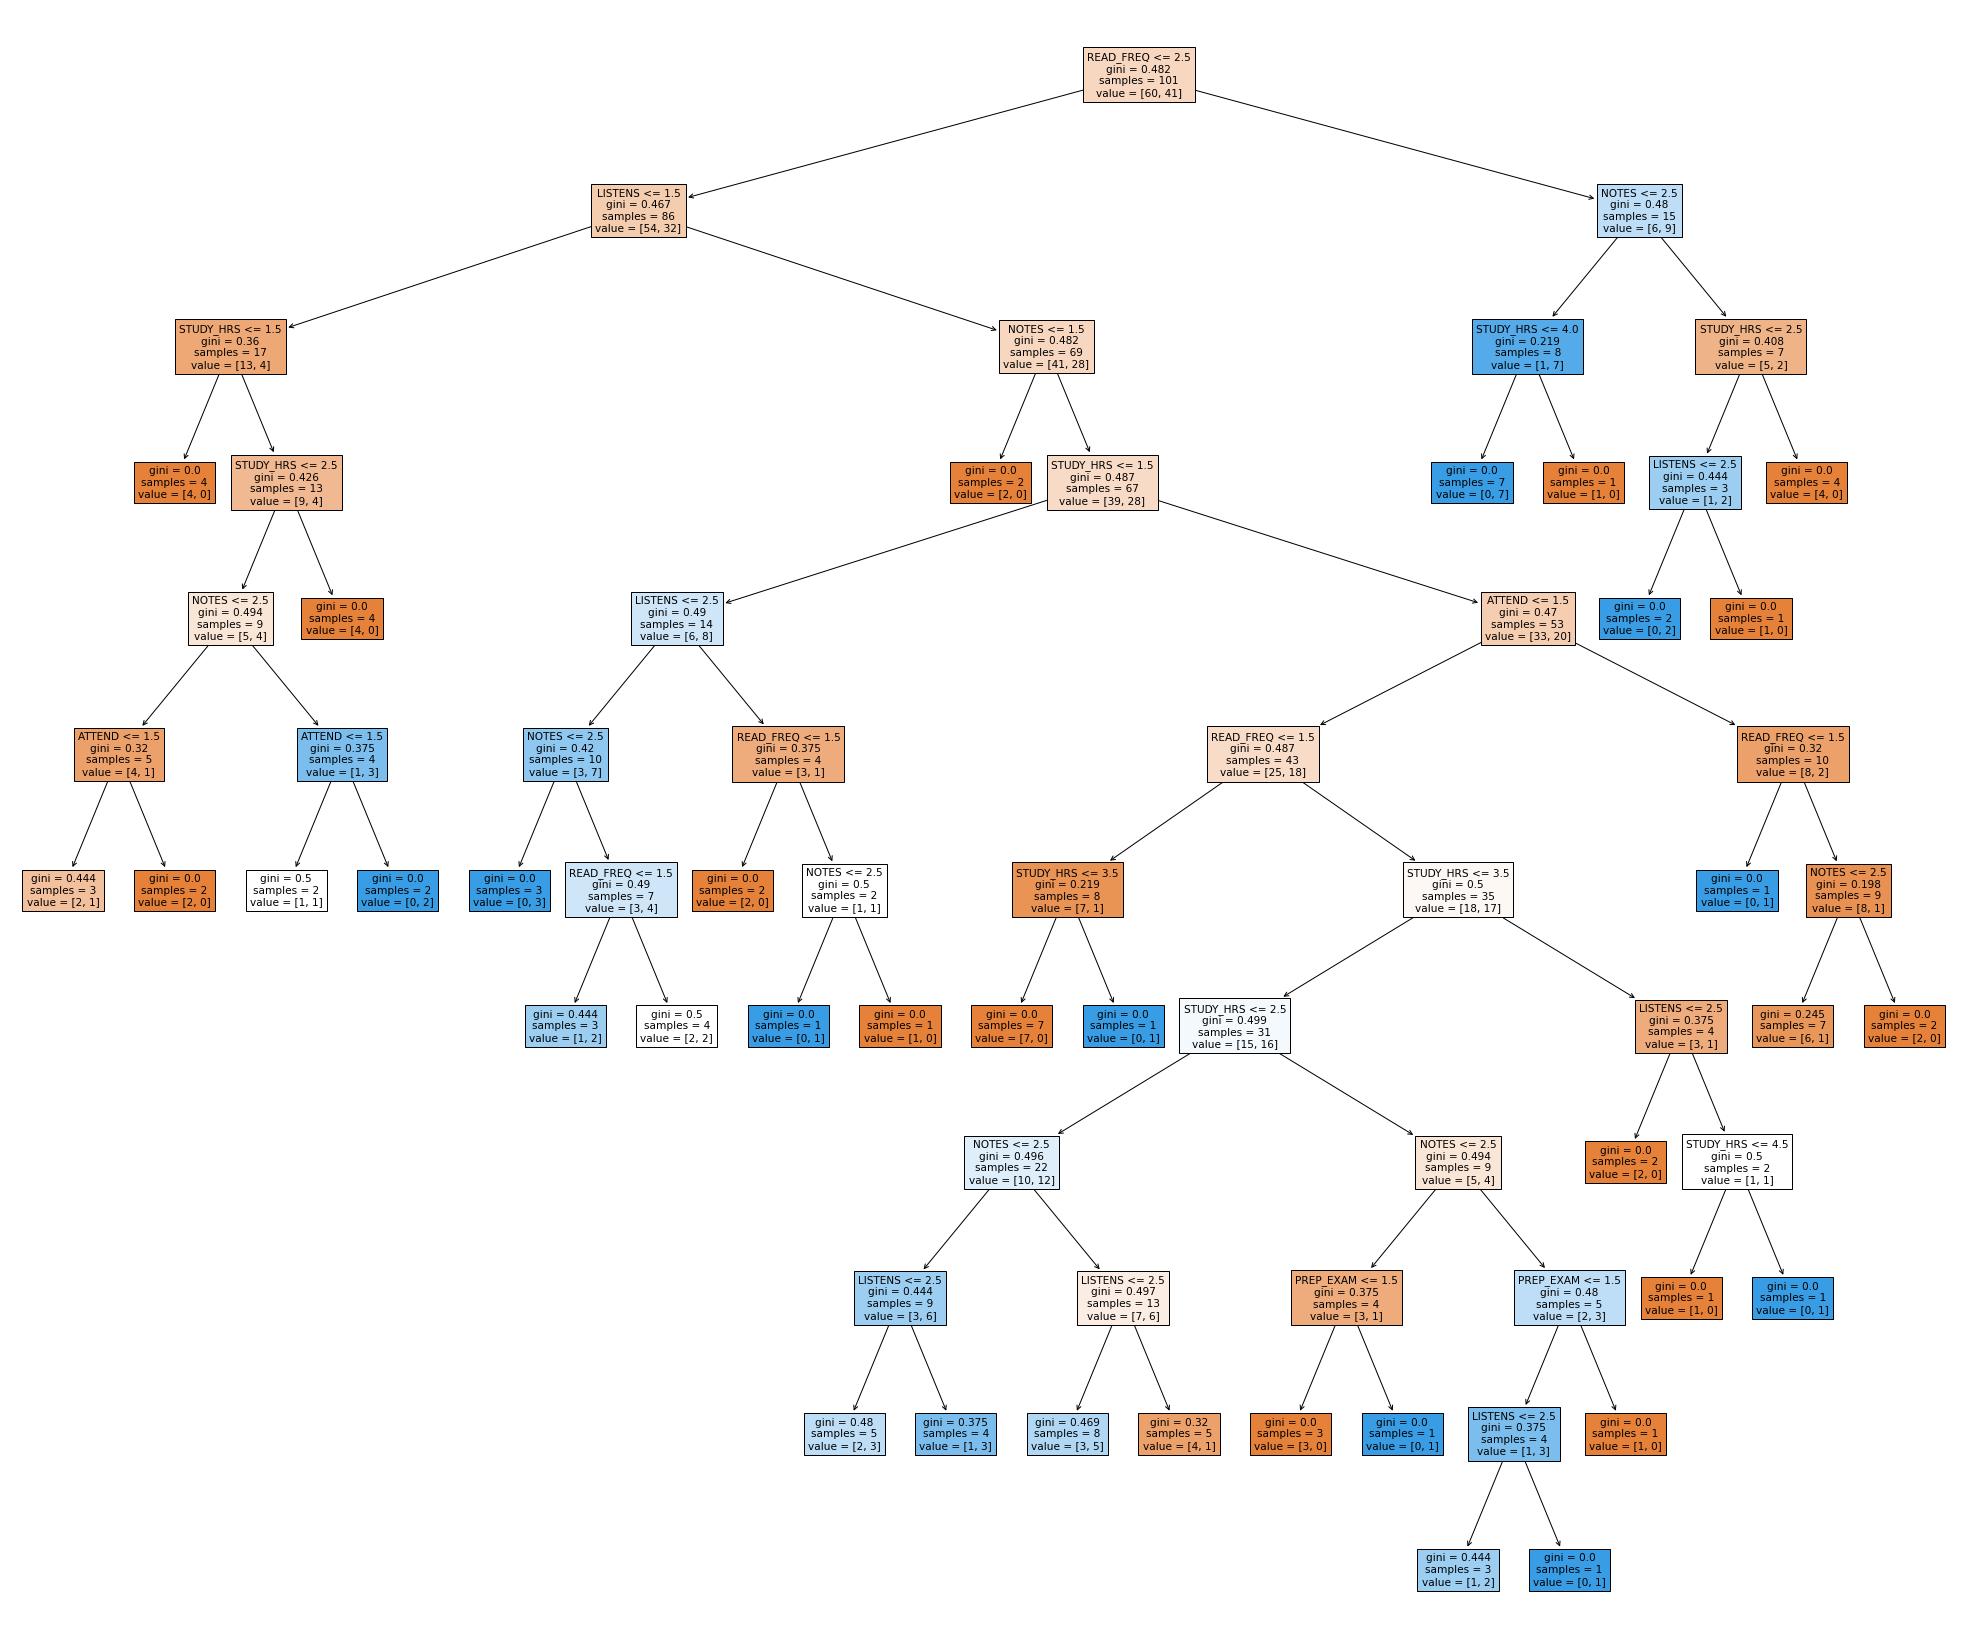

In [270]:
fig = plt.figure(figsize=(35,30))
tree.plot_tree(classifier, feature_names = x.columns, filled=True);

In [271]:
#Evaluation

In [272]:
df["Pass/Fail"].unique

<bound method Series.unique of 0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
140    1.0
141    1.0
142    0.0
143    1.0
144    0.0
Name: Pass/Fail, Length: 145, dtype: float64>

In [273]:
print(classifier.tree_.max_depth)

11


In [274]:
from sklearn import metrics

In [275]:
ypred = classifier.predict(xtest)
print("Accuracy:", metrics.accuracy_score(ytest, ypred))

Accuracy: 0.5681818181818182


In [276]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [277]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.66      0.68      0.67        28
         1.0       0.40      0.38      0.39        16

    accuracy                           0.57        44
   macro avg       0.53      0.53      0.53        44
weighted avg       0.56      0.57      0.57        44



In [278]:
confusion_matrix(ytest, ypred)

array([[19,  9],
       [10,  6]], dtype=int64)

In [279]:
classifier = tree.DecisionTreeClassifier(criterion='gini')
classifier.fit(xtrain, ytrain)
classifier.score(xtest, ytest)

0.5681818181818182

In [280]:
#use Gini metric in different depth
#source https://github.com/calvinhathcock/classification-project/blob/main/classifcation.ipynb 
for i in range(1, 10):   
    classifier = tree.DecisionTreeClassifier(criterion = 'gini', max_depth=i)
    classifier.fit(xtrain, ytrain)
    print(f"Depth {i} accuracy (Gini): {classifier.score(xtest, ytest)}")

Depth 1 accuracy (Gini): 0.6363636363636364
Depth 2 accuracy (Gini): 0.6363636363636364
Depth 3 accuracy (Gini): 0.6590909090909091
Depth 4 accuracy (Gini): 0.5909090909090909
Depth 5 accuracy (Gini): 0.5909090909090909
Depth 6 accuracy (Gini): 0.5681818181818182
Depth 7 accuracy (Gini): 0.5909090909090909
Depth 8 accuracy (Gini): 0.6136363636363636
Depth 9 accuracy (Gini): 0.6363636363636364


In [281]:
f1_score(ytest, ypred, average = 'weighted')

0.5650048875855327

In [282]:
#use entropy metric in different depth
#source https://github.com/calvinhathcock/classification-project/blob/main/classifcation.ipynb 
for i in range(1, 10):   
    classifier = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=i)
    classifier.fit(xtrain, ytrain)
    print(f"Depth {i} accuracy (Entropy): {classifier.score(xtest, ytest)}")

Depth 1 accuracy (Entropy): 0.6363636363636364
Depth 2 accuracy (Entropy): 0.6363636363636364
Depth 3 accuracy (Entropy): 0.6363636363636364
Depth 4 accuracy (Entropy): 0.5909090909090909
Depth 5 accuracy (Entropy): 0.5909090909090909
Depth 6 accuracy (Entropy): 0.5681818181818182
Depth 7 accuracy (Entropy): 0.5909090909090909
Depth 8 accuracy (Entropy): 0.6136363636363636
Depth 9 accuracy (Entropy): 0.6363636363636364


In [283]:
f1_score(ytest, ypred, average = 'weighted')

0.5650048875855327

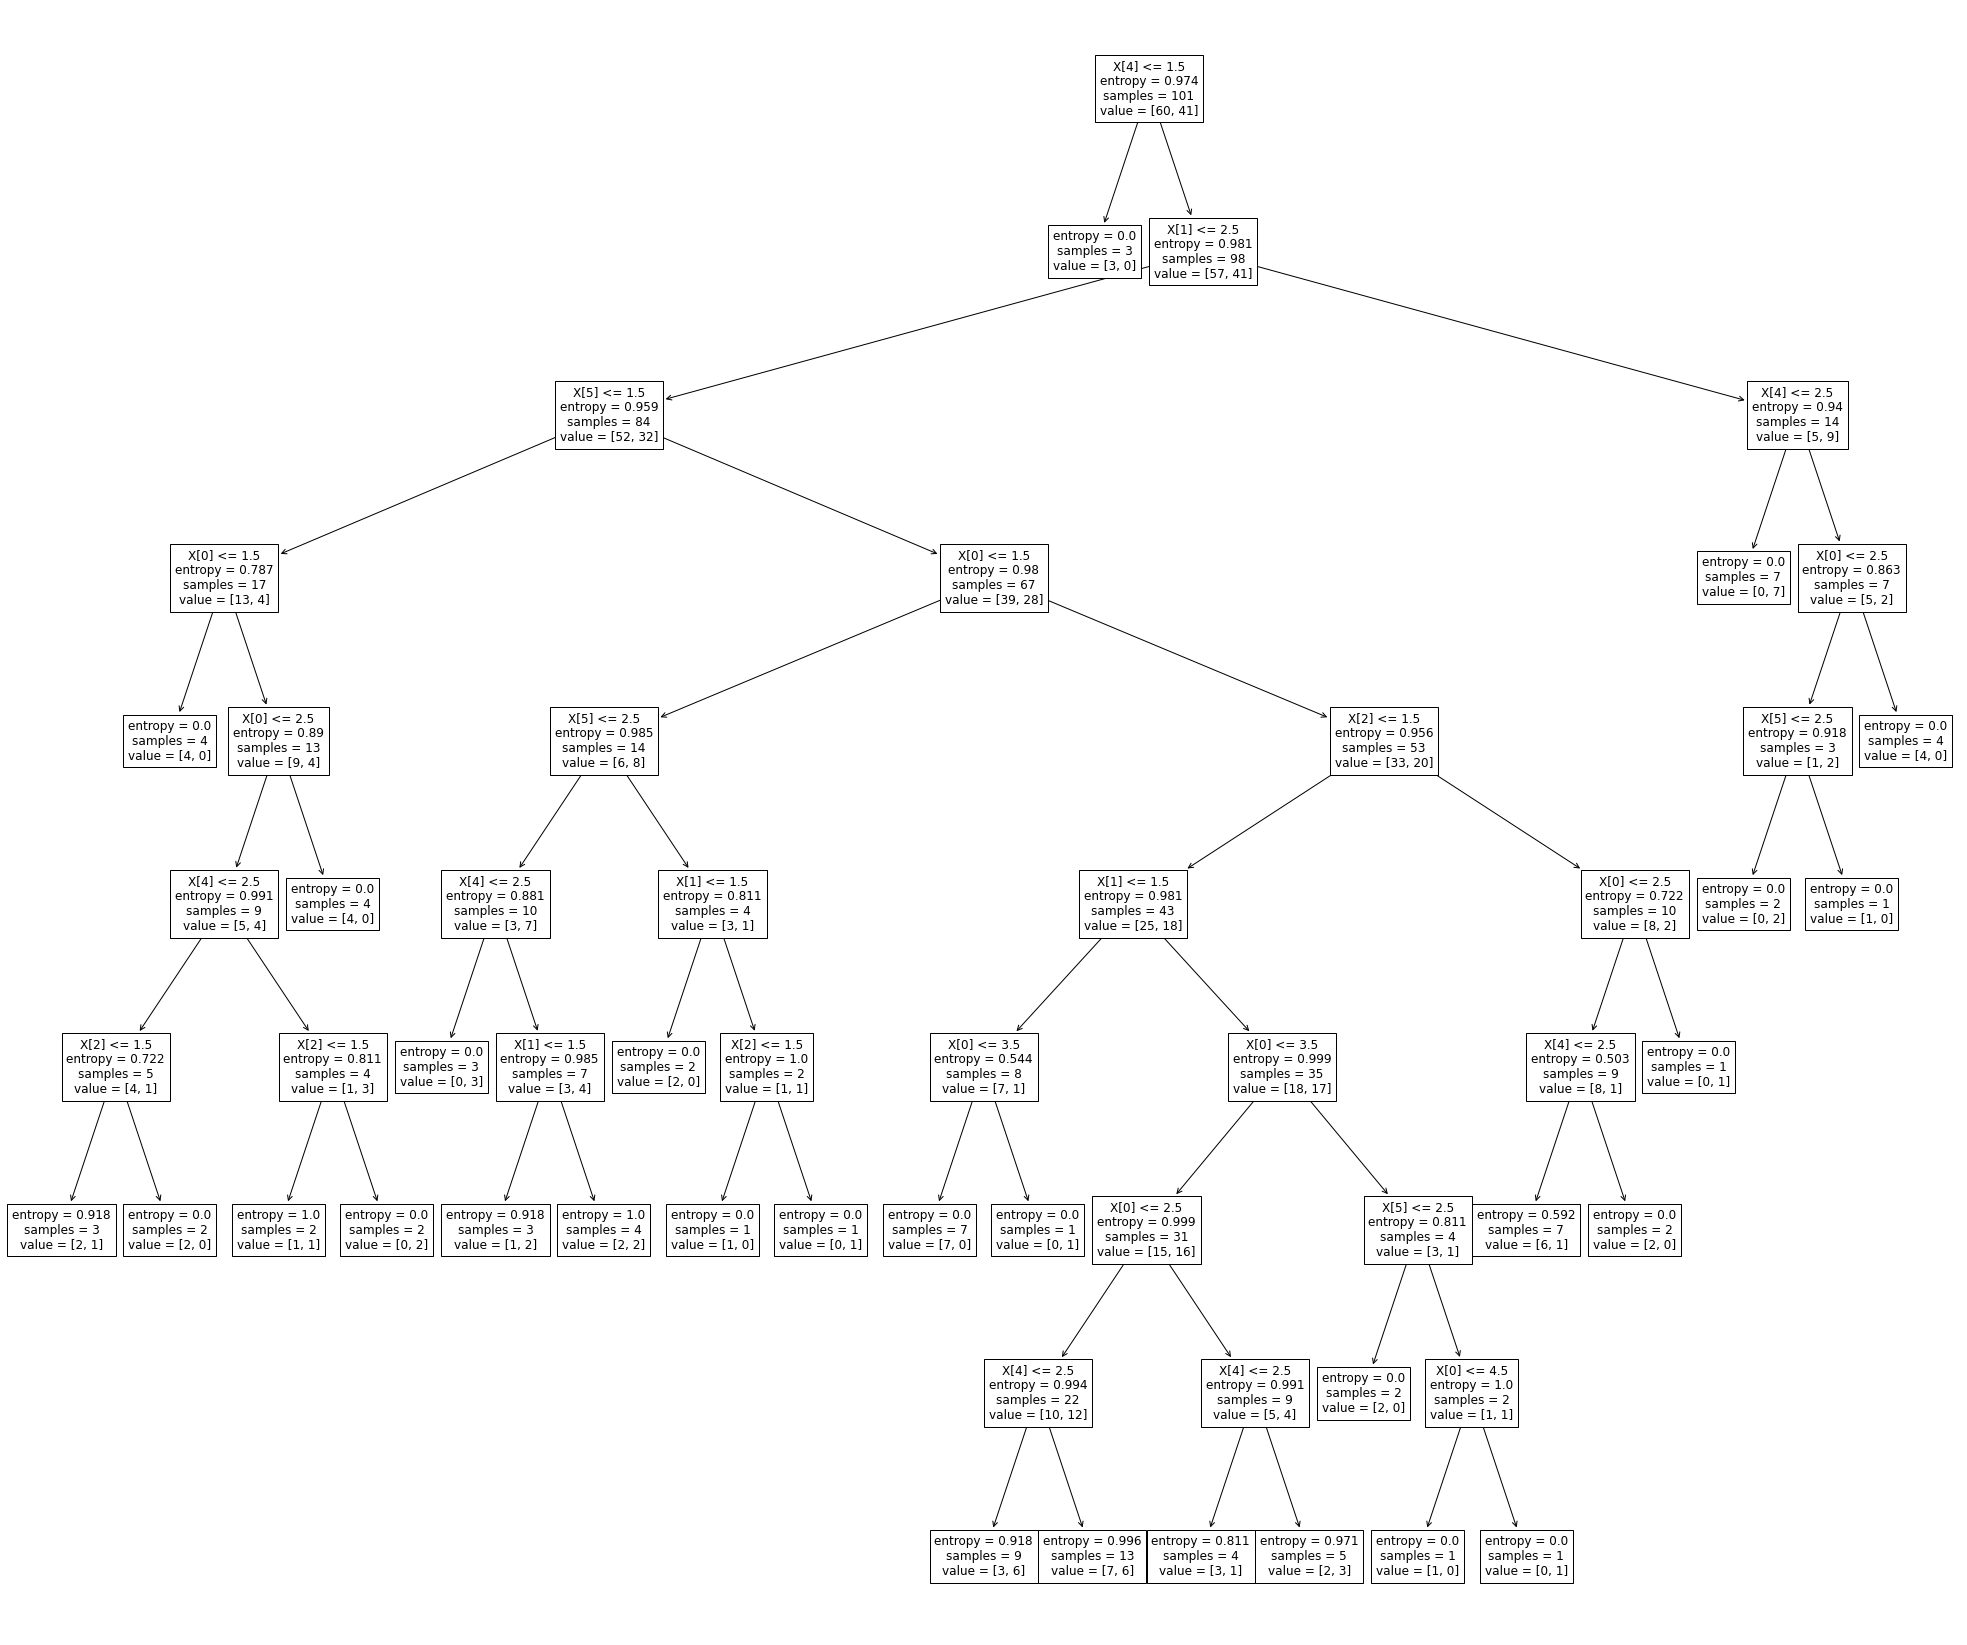

In [284]:
fig = plt.figure(figsize=(35,30))
tree.plot_tree(classifier);